### Fake Signed Petitions

**Jan 16, 2025**

**Description:** Generating fake voter record and petition records for testing purposes.


In [1]:
# !brew install poppler
# !pip install pillow pdf2image

In [2]:
import subprocess
import random
from pathlib import Path
from pdf2image import convert_from_path
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

from PIL import Image, ImageDraw, ImageFont
import numpy as np
import time

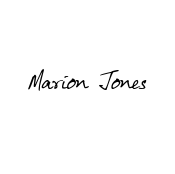

In [3]:
base_dir = 'fonts'
font_files = [f for f in os.listdir(base_dir) if f.endswith('.ttf')]

random_font = random.choice(font_files)
full_path = os.path.join(base_dir, random_font)
font_name = full_path.split("/")[1].split(".")[0]

if font_name == 'Virgil':
    font_name = 'Virgil 3 YOFF'


# Register the font
fontManager.addfont(full_path)

# Draw the plot
# Virgil 3 YOFF fontis used for y axis and title
plt.figure(figsize=(2, 2))
plt.text(0.5, 0.5, 'Marion Jones', fontname=font_name, fontsize=18, 
         horizontalalignment='center', verticalalignment='center')
plt.axis('off')  # Hide axes
plt.savefig('test.jpg', bbox_inches='tight', transparent=True)
plt.show()

In [4]:
# cursive fonts
cursive_fonts = ['QEgeeKzoid.ttf',
                 'QEBEV.ttf',
                 'QEDonaldRoss.ttf',
                 'QEGarrettWMoretz.ttf',
                 'QECursiveVersion.ttf',
                 'QEJER.ttf',
                 'QEJohnWilliams.ttf',
                 'QEKevinKnowles.ttf',
                 'QEKunjarScript.ttf',
                 'QEPamRosenberry.ttf',
                 'QERufus.ttf',
                 'QESamRoberts.ttf',
                 'QEScottWilliams.ttf',
                 ]

# non-cursive fonts
non_cursive_fonts = [f for f in font_files if f not in cursive_fonts]

def get_random_fonts():
    """Get a random cursive font and a random non-cursive font from the fonts directory"""
    base_dir = 'fonts'
    font_files = [f for f in os.listdir(base_dir) if f.endswith('.ttf')]
    
    # Get non-cursive fonts by excluding cursive ones
    non_cursive_fonts = [f for f in font_files if f not in cursive_fonts]
    
    # Select random fonts
    random_cursive = np.random.choice(cursive_fonts)
    random_non_cursive = np.random.choice(non_cursive_fonts)
    
    # Get full paths
    cursive_path = os.path.join(base_dir, random_cursive)
    non_cursive_path = os.path.join(base_dir, random_non_cursive)
    
    return cursive_path, non_cursive_path


In [5]:
# testing
get_random_fonts()

('fonts/QEJohnWilliams.ttf', 'fonts/QEVRead.ttf')

In [19]:
import time
def create_petition_image(signer_infos, circ_info, idx, output_path='fake_data_collection'):
    """
    Creates a petition image with signer and circulator information
    
    Args:
        signer_infos (list): List of dictionaries containing signer information, each with keys:
            'signature', 'address', 'printed_name', 'ward', 'date'
        circ_info (dict): Dictionary containing circulator information with keys:
            'name', 'address', 'date', 'date1', 'date2'
        idx (int): Index number for the page
        output_path (str): Directory to save output JPG file
    """
    # Open background image
    background = Image.open('INITIATIVE 82_empty.png')

    # Create a transparent overlay the same size as background
    overlay = Image.new('RGBA', background.size, (255, 255, 255, 0))

    # Create draw object
    draw = ImageDraw.Draw(overlay)

    # petition signer's info
    for i, signer_info in enumerate(signer_infos[:5]):  # Process up to 5 signers
        delta_y = 120*i

        # get random font

        # Coordinates and text sizes for signer fields
        xy_coords = {
            "printed_name": (900, 990+delta_y),
            "address": (275, 1000+delta_y),
            "signature": (305, 925+delta_y),
            "ward": (1550, 975+delta_y),
            "date": (1400, 975+delta_y)
        }
        text_sizes = {
            "printed_name": 48,
            "address": 35,
            "signature": 40,
            "ward": 48,
            "date": 48
        }

        for label, value in signer_info.items():
            path_cursive, path_non_cursive = get_random_fonts()
            if label == 'signature':
                full_path = path_cursive
            else:
                full_path = path_non_cursive
            x, y = xy_coords[label]
            try:
                draw.text((x, y), value, font=ImageFont.truetype(full_path, text_sizes[label]), fill=(0, 0, 0, 255), fontsize=18)
            except Exception as e:
                print(f"Error drawing text for {label} with font {full_path} and size {text_sizes[label]}")
                print(e)

    # Coordinates and font sizes for circulator fields
    circ_coords = {
        "name": [(600, 1780, 40)],
        "signature": [(1100, 2050, 40)],  # Multiple positions for name (regular + signature)
        "address": [(540, 1840, 38)],
        "date": [(180, 2050, 40)],
        "date1": [(800, 1985, 40)],
        "date2": [(1000, 1985, 40)]
    }

    # Draw each field
    for field, positions in circ_coords.items():
        for x0, y0, font_size in positions:
            text = circ_info[field]
            if field == 'signature':
                full_path = f'fonts/{cursive_fonts[0]}'
            else:
                full_path = f'fonts/{non_cursive_fonts[1]}'
            try:
                draw.text((x0, y0), text, font=ImageFont.truetype(full_path, font_size), fill=(0, 0, 0, 255), fontsize=18)
            except Exception as e:
                print(f"Error drawing text for {field} with font {full_path} and size {font_size}")
                print(e)

    # add a white opaque square to hide page number
    center_x, center_y = 275, 130
    width, height = 80, 60
    draw.rectangle((center_x-width/2, center_y-height/2, center_x+width/2, center_y+height/2), fill=(255, 255, 255, 255))
    draw.text((center_x-20, center_y-20), f"{idx+1}", font=ImageFont.truetype(full_path, 30), fill=(0, 0, 0, 255))
    center_x = center_x + 100
    draw.rectangle((center_x-width/2, center_y-height/2, center_x+width/2, center_y+height/2), fill=(255, 255, 255, 255))
    draw.text((center_x-20, center_y-20), "100", font=ImageFont.truetype(full_path, 30), fill=(0, 0, 0, 255))

    # add a white opaque square to hide address information
    center_x, center_y = 1370, 150
    width, height = 450, 40
    draw.rectangle((center_x-width/2, center_y-height/2, center_x+width/2, center_y+height/2), fill=(255, 255, 255, 255))

    # Combine images
    background.paste(overlay, (0, 0), overlay)

    # save image
    output_file = os.path.join(output_path, f'page-{idx}.jpg')
    background.save(output_file, 'JPEG', optimize=True, quality=75)

In [7]:
# testing
signer_infos = [
    {
        "signature": "Marion Jones",
        "address": "1234 Main St, Seattle, WA 98101",
        "printed_name": "Marion Jones",
        "ward": "1",
        "date": "1/15"
    },
    {
        "signature": "James Smith",
        "address": "567 Pine Ave, Seattle, WA 98102", 
        "printed_name": "James Smith",
        "ward": "2",
        "date": "1/15"
    },
    {
        "signature": "Sarah Williams",
        "address": "890 Oak Rd, Seattle, WA 98103",
        "printed_name": "Sarah Williams", 
        "ward": "3",
        "date": "1/15"
    },
    {
        "signature": "Michael Johnson",
        "address": "432 Elm St, Seattle, WA 98104",
        "printed_name": "Michael Johnson",
        "ward": "4", 
        "date": "1/15" 
    },
    {
        "signature": "Emily Brown",
        "address": "765 Cedar Ln, Seattle, WA 98105",
        "printed_name": "Emily Brown",
        "ward": "5",
        "date": "1/15"
    }
]

circ_info = {
    "name": "John Witherspoon",
    "signature": "John Witherspoon",
    "address": "1234 Main St, Seattle, WA 98101", 
    "date": "1/1/2025",
    "date1": "1/1/2025",
    "date2": "1/1/2025"
}


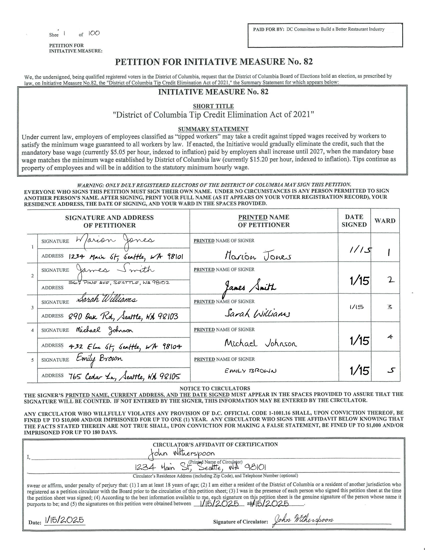

In [20]:

# create single petition page
create_petition_image(signer_infos, circ_info, 0)

# display image
img = Image.open('fake_data_collection/page-0.jpg')
scale = 0.25
width, height = img.size
new_size = (int(width*scale), int(height*scale))
img.resize(new_size)

#### Gathering Fake Voter Records

In [9]:
import pandas as pd
from pandas import DataFrame

# getting voter records
df_all = pd.read_csv('fake_data_collection/all_petition_signers.csv')
# rearrange results
df_all = df_all.sample(n=500, random_state=42)

In [10]:
# converting row element to signer's data format
voter_records_results = df_all.to_dict(orient='records')

In [11]:
formatted_voter_records = []
for i, signer_info in enumerate(voter_records_results):
    temp_dict = {}
    temp_dict['signature'] = signer_info['First_Name'] + ' ' + signer_info['Last_Name']
    temp_dict['address'] = f"{signer_info['Street_Number']} {signer_info['Street_Name']}"
    temp_dict['printed_name'] = signer_info['First_Name'] + ' ' + signer_info['Last_Name']
    temp_dict['ward'] = str(np.random.randint(1, 8))
    temp_dict['date'] = np.random.choice(['1/15'])
    formatted_voter_records.append(temp_dict)

In [12]:
# breaking up list of 1000 elements into 100 lists of 10 elements each
n = 5  # size of each sublist
petition_sublists = [formatted_voter_records[i:i + n] for i in range(0, len(formatted_voter_records), n)]
petition_sublists[:2]


[[{'signature': 'Alexis Walter',
   'address': '23407 Hawkins Lock',
   'printed_name': 'Alexis Walter',
   'ward': '4',
   'date': '1/15'},
  {'signature': 'Jenny Jones',
   'address': '82424 Rachel Views',
   'printed_name': 'Jenny Jones',
   'ward': '5',
   'date': '1/15'},
  {'signature': 'Jack Stewart',
   'address': '756 Ashley Court Suite 408',
   'printed_name': 'Jack Stewart',
   'ward': '2',
   'date': '1/15'},
  {'signature': 'Brady Herrera',
   'address': '88242 Gray Well',
   'printed_name': 'Brady Herrera',
   'ward': '5',
   'date': '1/15'},
  {'signature': 'Robert Ayala',
   'address': '6563 Charles Greens Apt. 636',
   'printed_name': 'Robert Ayala',
   'ward': '1',
   'date': '1/15'}],
 [{'signature': 'Erik Acosta',
   'address': '734 William Oval',
   'printed_name': 'Erik Acosta',
   'ward': '2',
   'date': '1/15'},
  {'signature': 'William Hopkins',
   'address': '1869 Cathy Mews Apt. 061',
   'printed_name': 'William Hopkins',
   'ward': '2',
   'date': '1/15'},
 

#### Creating and Saving Fake Signed Petitions

In [13]:
# circ_info is the circulator's information
circ_info = {
    "name": "John Witherspoon",
    "signature": "John Witherspoon",
    "address": "1234 Main St, Seattle, WA 98101", 
    "date": "1/15/2025",
    "date1": "1/15/2025",
    "date2": "1/15/2025"
}

# processing subunits
for i, sublist in enumerate(petition_sublists):
    create_petition_image(sublist, circ_info, i)
    # print(i, len(sublist))
    # print(sublist)

In [14]:
from PIL import Image

def save_jpg_as_pdf(jpg_files, output_pdf):
    """Saves multiple JPG files as individual pages in a PDF."""

    sorted_files = sorted(jpg_files, key=lambda x: int(x.split('_')[-1].split('.')[0]))
    
    images = [Image.open(jpg_file) for jpg_file in sorted_files]
    images = [img.convert('RGB') for img in images]

    if images:
        images[0].save(output_pdf, save_all=True, append_images=images[1:])

# get all png files in fake_data_collection
jpg_files = [os.path.join('fake_data_collection', f) for f in os.listdir('fake_data_collection') if f.endswith('.jpg')]

# save as pdf
save_jpg_as_pdf(jpg_files, 'fake_data_collection/fake_signed_petitions.pdf')


In [15]:
#cleaning up jpg files
for file in jpg_files:
    os.remove(file)

**Conclusion:**